<a href="https://colab.research.google.com/github/Edrodriguezcarcamo/Termodinamica/blob/main/4_Ciclo_ideal_de_refrigeraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciclo Ideal de Refrigeración

En un refrigerador se utiliza refrigerante 134a como fluido de trabajo que opera en un ciclo ideal de refrigeración entre 0.14 y 0.8 MPa. Si el flujo másico del refrigerante es 0.05 kg/s, dibuje el ciclo en un diagrama p-h y determine:

1.   La tasa de eliminación de calor del espacio refrigerado y la entrada de potencia al compresor.
2.  La tasa de rechazo de calor al ambiente
3.  El COP del refrigerador



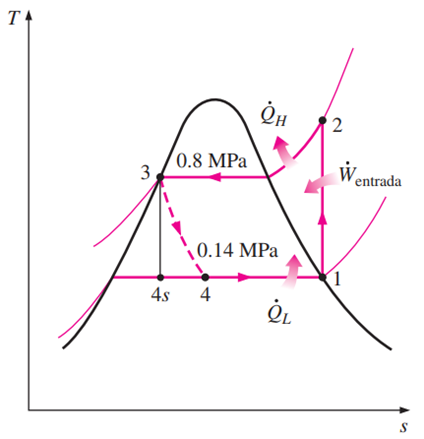

Para resolver el problema, primero debemos instalar la librería Coolprop e importarla. Por ende:

In [1]:
pip install coolprop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 52.7 MB/s eta 0:00:00


In [2]:
import CoolProp.CoolProp as cp

Después, debemos definir los datos de entrada que se nos dan en el enunciado del problema.

In [3]:
cp.set_reference_state('R134a','ASHRAE')

fluid = 'R134a'
P_1 = 0.14 * 1e6 # Pa
P_2 = 0.8 *1e6 # Pa
m = 0.05 # kg/s

Ahora, calcularemos las propiedades para cada uno de los estados:

# Estado 1

In [4]:
h_1 = cp.PropsSI("H", "P", P_1, "Q", 1, fluid) # (J/kg)
print(f'Entalpía 1: {h_1/1000:.2f} [kJ/kg]')

s_1 = cp.PropsSI("S", "P", P_1, "Q", 1, fluid) # (J/kg)
print(f'Entropía 1: {s_1/1000:.2f} [kJ/kg]')

v_1 = 1 / cp.PropsSI("D", "P", P_1, "Q", 1, fluid)  # m3/kg
print(f'Volumen específico 1: {v_1:.7f} [m3/kg]')

Entalpía 1: 239.18 [kJ/kg]
Entropía 1: 0.94 [kJ/kg]
Volumen específico 1: 0.1401478 [m3/kg]


# Estado 2

In [5]:
s_2 = s_1
print(f'Entropía 2: {s_2/1000:.2f} [kJ/kg]')

h_2 = cp.PropsSI("H", "P", P_2, "S", s_2, fluid) # (J/kg)
print(f'Entalpía 2: {h_2/1000:.2f} [kJ/kg]')

Entropía 2: 0.94 [kJ/kg]
Entalpía 2: 275.39 [kJ/kg]


# Estado 3

In [6]:
P_3 = P_2
h_3 = cp.PropsSI("H", "P", P_3, "Q", 0, fluid) # (J/kg)
print(f'Entalpía 3: {h_3/1000:.2f} [kJ/kg]')

s_3 = cp.PropsSI("S", "P", P_3, "Q", 0, fluid) # (J/kg)
print(f'Entropía 3: {s_3/1000:.2f} [kJ/kg]')

Entalpía 3: 95.50 [kJ/kg]
Entropía 3: 0.35 [kJ/kg]


# Estado 4

In [7]:
h_4 = h_3
print(f'Entalpía 4: {h_4/1000:.2f} [kJ/kg]')

P_4 = P_1
s_4 = cp.PropsSI("S", "P", P_4, "H", h_4, fluid) # (J/kg)
print(f'Entropía 4: {s_1/1000:.2f} [kJ/kg]')

Entalpía 4: 95.50 [kJ/kg]
Entropía 4: 0.94 [kJ/kg]


# Cálculo de los Resultados
La tasa de eliminación de calor se calcula como:

$\dot{Q}_{L}=\dot{m}(h_{1}-h_{4})$

In [8]:
Q_L = m * (h_1 - h_4 ) # W
print(f'Tasa de eliminación de calor: {Q_L/1000:.2f} [kW]')

Tasa de eliminación de calor: 7.18 [kW]


La entrada de potencia al compresor es:

$\dot{W}_{ent}=\dot{m}(h_{2}-h_{1})$

In [9]:
W_ent = m * ( h_2 - h_1 ) # W
print(f'Entrada de potencia al compresor: {W_ent/1000:.2f} [kW]')

Entrada de potencia al compresor: 1.81 [kW]


La tasa de rechazo de calor al ambiente es:

$\dot{Q}_H = \dot{m}(h_{2}-h_{3})$

In [10]:
Q_H = m * (h_2 - h_3)
print(f'Tasa de rechazo de calor: {Q_H/1000:.2f} [kW]')

Tasa de rechazo de calor: 8.99 [kW]


Finalmente, el COP del sistema de refrigeración ideal es:

$COP_{R}=\frac{\dot{Q}_L}{\dot{W}_{ent}}$

In [11]:
COP = Q_L / W_ent
print(f'Coeficiente de Desempeño: {COP:.2f}')

Coeficiente de Desempeño: 3.97


El código completo sería:

In [12]:
import CoolProp.CoolProp as cp

cp.set_reference_state('R134a','ASHRAE')

fluid = 'R134a'
P_1 = 0.14 * 1e6 # Pa
P_2 = 0.8 *1e6 # Pa
m = 0.05 # kg/s

# ESTADO 1

h_1 = cp.PropsSI("H", "P", P_1, "Q", 1, fluid) # (J/kg)
print(f'Entalpía 1: {h_1/1000:.2f} [kJ/kg]')

s_1 = cp.PropsSI("S", "P", P_1, "Q", 1, fluid) # (J/kg)
print(f'Entropía 1: {s_1/1000:.2f} [kJ/kg]')

v_1 = v_esp = 1 / cp.PropsSI("D", "P", P_1, "Q", 1, fluid)  # m3/kg
print(f'Volumen específico 1: {v_1/1000:.7f} [kJ/kg]')

# ESTADO 2

s_2 = s_1
print(f'Entropía 2: {s_2/1000:.2f} [kJ/kg]')

h_2 = cp.PropsSI("H", "P", P_2, "S", s_2, fluid) # (J/kg)
print(f'Entalpía 2: {h_2/1000:.2f} [kJ/kg]')

# ESTADO 3

P_3 = P_2
h_3 = cp.PropsSI("H", "P", P_3, "Q", 0, fluid) # (J/kg)
print(f'Entalpía 3: {h_3/1000:.2f} [kJ/kg]')

s_3 = cp.PropsSI("S", "P", P_3, "Q", 0, fluid) # (J/kg)
print(f'Entropía 3: {s_3/1000:.2f} [kJ/kg]')

# ESTADO 4

h_4 = h_3
print(f'Entalpía 4: {h_4/1000:.2f} [kJ/kg]')

P_4 = P_1
s_4 = cp.PropsSI("S", "P", P_4, "H", h_4, fluid) # (J/kg)
print(f'Entropía 4: {s_1/1000:.2f} [kJ/kg]')

# RESULTADOS

Q_L = m * (h_1 - h_4 ) # W
print(f'Tasa de eliminación de calor: {Q_L/1000:.2f} [kW]')

W_ent = m * ( h_2 - h_1 ) # W
print(f'Entrada de potencia al compresor: {W_ent/1000:.2f} [kW]')

Q_H = m * (h_2 - h_3)
print(f'Tasa de rechazo de calor: {Q_H/1000:.2f} [kW]')

COP = Q_L / W_ent
print(f'Coeficiente de Desempeño: {COP:.2f}')

Entalpía 1: 239.18 [kJ/kg]
Entropía 1: 0.94 [kJ/kg]
Volumen específico 1: 0.0001401 [kJ/kg]
Entropía 2: 0.94 [kJ/kg]
Entalpía 2: 275.39 [kJ/kg]
Entalpía 3: 95.50 [kJ/kg]
Entropía 3: 0.35 [kJ/kg]
Entalpía 4: 95.50 [kJ/kg]
Entropía 4: 0.94 [kJ/kg]
Tasa de eliminación de calor: 7.18 [kW]
Entrada de potencia al compresor: 1.81 [kW]
Tasa de rechazo de calor: 8.99 [kW]
Coeficiente de Desempeño: 3.97


Pero aún nos falta algo... dibujar el proceso en un diagrama p-h. Para poder hacer el diagrama, debemos importar nuevas funciones:

In [13]:
import CoolProp
from CoolProp.Plots import PropertyPlot # Función que nos permite dibujar diagramas P-h o T-s
from CoolProp.Plots import StateContainer # Función para definir mi conjunto de propiedades

Debemos realizar el ciclo indicandole a coolprop las variables que corresponden a cada uno de los estados. Por ende:

In [14]:
# DEFINICIÓN DE LOS ESTADOS PARA EL CICLO

ref_cycle_intercooler = StateContainer()

# Estados de la presión
ref_cycle_intercooler[1,"P"] = P_1
ref_cycle_intercooler[2,"P"] = P_2
ref_cycle_intercooler[3,"P"] = P_3
ref_cycle_intercooler[4,"P"] = P_4
ref_cycle_intercooler[5,"P"] = P_1

# Estados de la entalpía
ref_cycle_intercooler[1,"H"] = h_1
ref_cycle_intercooler[2,"H"] = h_2
ref_cycle_intercooler[3,"H"] = h_3
ref_cycle_intercooler[4,"H"] = h_4
ref_cycle_intercooler[5,"H"] = h_1

print(ref_cycle_intercooler)

Stored State Points:
state        T (K)       p (Pa)    d (kg/m3)     h (J/kg)   s (J/kg/K)
    1            -   140000.000            -   239175.923            -
    2            -   800000.000            -   275387.922            -
    3            -   800000.000            -    95501.360            -
    4            -   140000.000            -    95501.360            -
    5            -   140000.000            -   239175.923            -



Realizaremos primero un diagrama $p-h$ sin los estados con tal de visualizar la figura que entrega Coolprop:

/usr/local/lib/python3.10/dist-packages/CoolProp/Plots/Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/CoolProp/Plots/Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/CoolProp/Plots/Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


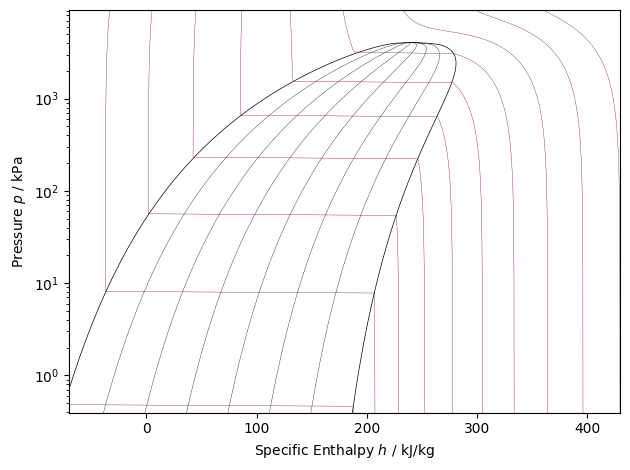

In [15]:
# Diagrama P-h

# Se llama primero al entorno PropertyPlot
ph_plot = PropertyPlot("R134a", "Ph")

# Definamos ahora isolíneas (Que serán de calidad de vapor y temperatura)
ph_plot.calc_isolines(CoolProp.iQ, num=8) # Son isolíneas de la calidad
ph_plot.calc_isolines(CoolProp.iT, num=10) # Son isolíneas de temperatura
ph_plot.show()

Ahora, al diagrama previamente mostrado le dibujaremos el ciclo de nuestro problema:

/usr/local/lib/python3.10/dist-packages/CoolProp/Plots/Plots.py:301: UserWarning: You called the function "draw_process", which is not tested.
  warnings.warn("You called the function \"draw_process\", which is not tested.", UserWarning)


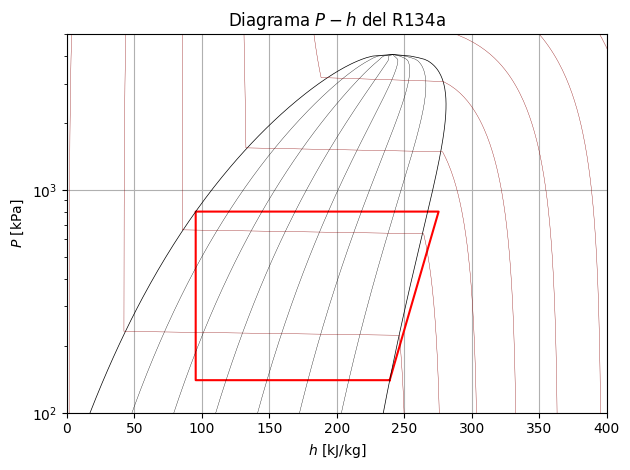

In [16]:
ph_plot = PropertyPlot("R134a", "Ph")
ph_plot.calc_isolines(CoolProp.iQ, num=8)
ph_plot.calc_isolines(CoolProp.iT, num=10)

# Las configuraciones se hacen igual que con matplotlib
ph_plot.title(r'Diagrama $P-h$ del R134a')
ph_plot.xlabel(r'$h$ [kJ/kg]')
ph_plot.ylabel(r'$P$ [kPa]') # Indicando que mi eje estará en kPa
ph_plot.set_axis_limits([0, 400, 100, 5000])
ph_plot.grid()
# h y s también están en kJ/kg y kJ/kg K respectivamente
# Dibujamos el ciclo
ph_plot.draw_process(ref_cycle_intercooler)
ph_plot.show()

Finalmente, el código completo para nuestro problema quedaría de la siguiente forma:

Entalpía 1: 239.18 [kJ/kg]
Entropía 1: 0.94 [kJ/kg]
Volumen específico 1: 0.0001401 [kJ/kg]
Entropía 2: 0.94 [kJ/kg]
Entalpía 2: 275.39 [kJ/kg]
Entalpía 3: 95.50 [kJ/kg]
Entropía 3: 0.35 [kJ/kg]
Entalpía 4: 95.50 [kJ/kg]
Entropía 4: 0.94 [kJ/kg]
Tasa de eliminación de calor: 7.18 [kW]
Entrada de potencia al compresor: 1.81 [kW]
Tasa de rechazo de calor: 8.99 [kW]
Coeficiente de Desempeño: 3.97
Stored State Points:
state        T (K)       p (Pa)    d (kg/m3)     h (J/kg)   s (J/kg/K)
    1            -   140000.000            -   239175.923            -
    2            -   800000.000            -   275387.922            -
    3            -   800000.000            -    95501.360            -
    4            -   140000.000            -    95501.360            -
    5            -   140000.000            -   239175.923            -



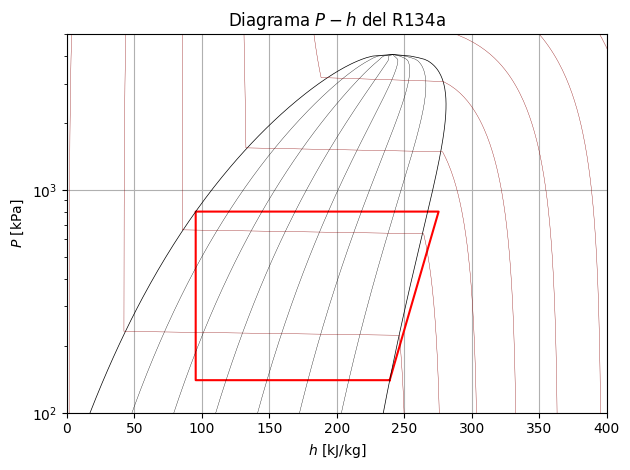

In [18]:
import CoolProp.CoolProp as cp
import CoolProp
from CoolProp.Plots import PropertyPlot # Función que nos permite dibujar diagramas P-h o T-s
from CoolProp.Plots import StateContainer # Función para definir mi conjunto de propiedades


cp.set_reference_state('R134a','ASHRAE')

fluid = 'R134a'
P_1 = 0.14 * 1e6 # Pa
P_2 = 0.8 *1e6 # Pa
m = 0.05 # kg/s

# ESTADO 1

h_1 = cp.PropsSI("H", "P", P_1, "Q", 1, fluid) # (J/kg)
print(f'Entalpía 1: {h_1/1000:.2f} [kJ/kg]')

s_1 = cp.PropsSI("S", "P", P_1, "Q", 1, fluid) # (J/kg)
print(f'Entropía 1: {s_1/1000:.2f} [kJ/kg]')

v_1 = v_esp = 1 / cp.PropsSI("D", "P", P_1, "Q", 1, fluid)  # m3/kg
print(f'Volumen específico 1: {v_1/1000:.7f} [kJ/kg]')

# ESTADO 2

s_2 = s_1
print(f'Entropía 2: {s_2/1000:.2f} [kJ/kg]')

h_2 = cp.PropsSI("H", "P", P_2, "S", s_2, fluid) # (J/kg)
print(f'Entalpía 2: {h_2/1000:.2f} [kJ/kg]')

# ESTADO 3

P_3 = P_2
h_3 = cp.PropsSI("H", "P", P_3, "Q", 0, fluid) # (J/kg)
print(f'Entalpía 3: {h_3/1000:.2f} [kJ/kg]')

s_3 = cp.PropsSI("S", "P", P_3, "Q", 0, fluid) # (J/kg)
print(f'Entropía 3: {s_3/1000:.2f} [kJ/kg]')

# ESTADO 4

h_4 = h_3
print(f'Entalpía 4: {h_4/1000:.2f} [kJ/kg]')

P_4 = P_1
s_4 = cp.PropsSI("S", "P", P_4, "H", h_4, fluid) # (J/kg)
print(f'Entropía 4: {s_1/1000:.2f} [kJ/kg]')

# RESULTADOS

Q_L = m * (h_1 - h_4 ) # W
print(f'Tasa de eliminación de calor: {Q_L/1000:.2f} [kW]')

W_ent = m * ( h_2 - h_1 ) # W
print(f'Entrada de potencia al compresor: {W_ent/1000:.2f} [kW]')

Q_H = m * (h_2 - h_3)
print(f'Tasa de rechazo de calor: {Q_H/1000:.2f} [kW]')

COP = Q_L / W_ent
print(f'Coeficiente de Desempeño: {COP:.2f}')


# DEFINICIÓN DE LOS ESTADOS PARA EL CICLO

ref_cycle_intercooler = StateContainer()

# Estados de la presión
ref_cycle_intercooler[1,"P"] = P_1
ref_cycle_intercooler[2,"P"] = P_2
ref_cycle_intercooler[3,"P"] = P_3
ref_cycle_intercooler[4,"P"] = P_4
ref_cycle_intercooler[5,"P"] = P_1

# Estados de la entalpía
ref_cycle_intercooler[1,"H"] = h_1
ref_cycle_intercooler[2,"H"] = h_2
ref_cycle_intercooler[3,"H"] = h_3
ref_cycle_intercooler[4,"H"] = h_4
ref_cycle_intercooler[5,"H"] = h_1

print(ref_cycle_intercooler)

# PLOTEO DEL CICLO

ph_plot = PropertyPlot("R134a", "Ph")
ph_plot.calc_isolines(CoolProp.iQ, num=8)
ph_plot.calc_isolines(CoolProp.iT, num=10)

# Las configuraciones se hacen igual que con matplotlib
ph_plot.title(r'Diagrama $P-h$ del R134a')
ph_plot.xlabel(r'$h$ [kJ/kg]')
ph_plot.ylabel(r'$P$ [kPa]') # Indicando que mi eje estará en kPa
ph_plot.set_axis_limits([0, 400, 100, 5000])
ph_plot.grid()
# h y s también están en kJ/kg y kJ/kg K respectivamente
# Dibujamos el ciclo
ph_plot.draw_process(ref_cycle_intercooler)
ph_plot.show()